This is the first of a series of tutorials on useful R packges which I call the lifesaver R packages. If you want to run the tutorials on jupyter notebook, you can find the notebooks at [lifesaver-R-packages](https://github.com/shettysindhu63/lifesaver-R-packages). 

Today we will be exploring the titanic dataset with two of my favourite libraries, **ggplot2** and **dplyr**. For more details about the dataset, visit the [Kaggle site](https://www.kaggle.com/c/titanic).

### The Packages 

- The **dplyr** package provides functions for easy and fast data manipulation. You can review the [dplyr vignette](https://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html) for a comprehensive introduction to **dplyr** verbs. 


- **ggplot2** is a graphing package implemented in R based on the [Grammar of Graphics](http://www.springer.com/gp/book/9780387245447). In the grammar of graphics system, the graphic/plot is made up of several layers : data, aesthetics, geometries, facets, statistics, coordinates and theme. A compact intro can be read [here](https://codewords.recurse.com/issues/six/telling-stories-with-data-using-the-grammar-of-graphics). 
<!-- TEASER_END -->

### Get the data

The first step is to import the required packages and the datasets. 
Along with **ggplot2** and **dplyr**, we will also use **magrittr** which lets us use the pipe operation that makes the code more readable and concise. 

In [23]:
# load packages 
library(ggplot2)
library(dplyr)
library(magrittr)

In [3]:
# load data
dataset = read.csv('data/titanic/train.csv')

# check for missing values 
dataset %>% 
    sapply(function(y) sum(is.na(y)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

We see that the value for column Age is missing in 177 observations. There are several ways to handle missing values: you could omit them completely or impute the missing values with mean, median or some other statistic of all other values in that partcular column. In this case, I do not want to presume anything about the ages of the passengers, so I will exclude the missing observations completely from further analysis which includes the Age feature.

Let's look at the first few rows of the dataset while we decide what we might want to explore. 

In [4]:
# print first six rows of the dataset
head(dataset)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


I suggest looking into the [data overview](https://www.kaggle.com/c/titanic/data) provided by Kaggle to check what each of the columns represent. Some columns are obviously not relevant to whether the passenger survived or not, like PassengerID, Name, Ticket number. Out of the others, let us select a few columns first to start simple : consider only ticket class (Pclass), sex, age and port of embarkation (Embarked).  

In [5]:
# select only required columns 
dataset = select(dataset, Survived, Pclass, Sex, Age, Embarked)

### Summarize the data 

Next, we may want to see the survival rate for different groups. This is where **dplyr** and **magrittr** together shine, you'll see how easy it is to write the *split-apply-combine* strategy. 

In [6]:
# Check the survival rate for different genders 
dataset %>%
    group_by(Sex) %>%
    summarize(Total = length(Sex), Survived  = sum(Survived), Rate = round((Survived/Total)*100,2))

Sex,Total,Survived,Rate
female,314,233,74.20
male,577,109,18.89


In [7]:
# Check the survival rate for different classes 
dataset %>%
    group_by(Pclass) %>%
    summarize(Total = length(Pclass), Survived  = sum(Survived), Rate = round((Survived/Total)*100,2))

Pclass,Total,Survived,Rate
1,216,136,62.96
2,184,87,47.28
3,491,119,24.24


In [8]:
# Check the survival rate by grouping Sex and Pclass
dataset %>%
    group_by(Sex, Pclass) %>%
    summarize(Total = length(Pclass), Survived  = sum(Survived), Rate = round((Survived/Total)*100,2))

Sex,Pclass,Total,Survived,Rate
female,1,94,91,96.81
female,2,76,70,92.11
female,3,144,72,50.00
male,1,122,45,36.89
male,2,108,17,15.74
male,3,347,47,13.54


###  Visualize the data 

As the tables get bigger, it will become difficult to interpret the numbers. This is where exploratory graphs can help us understand the data better. I have indicated the specific layers of grammar of graphics in the comments to improve the interpretation of ggplot2 code. 

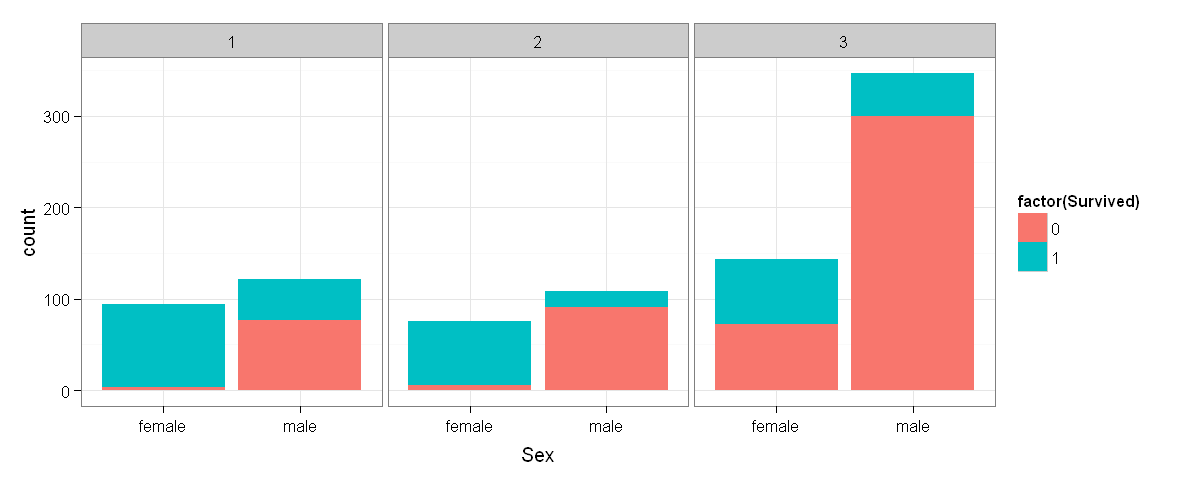

In [15]:
options(repr.plot.width=10, repr.plot.height=4)
# visualising the survival rate for sex and Pclass groups 
g = ggplot(data = dataset, aes(Sex, fill = factor(Survived))) # data and aesthetics 
g = g + geom_bar()          # geometries
g = g + facet_grid(~Pclass) # facets 
g = g + theme_bw()          # theme  
print(g)

Warning message:
"Removed 30 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 11 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 136 rows containing non-finite values (stat_ydensity)."

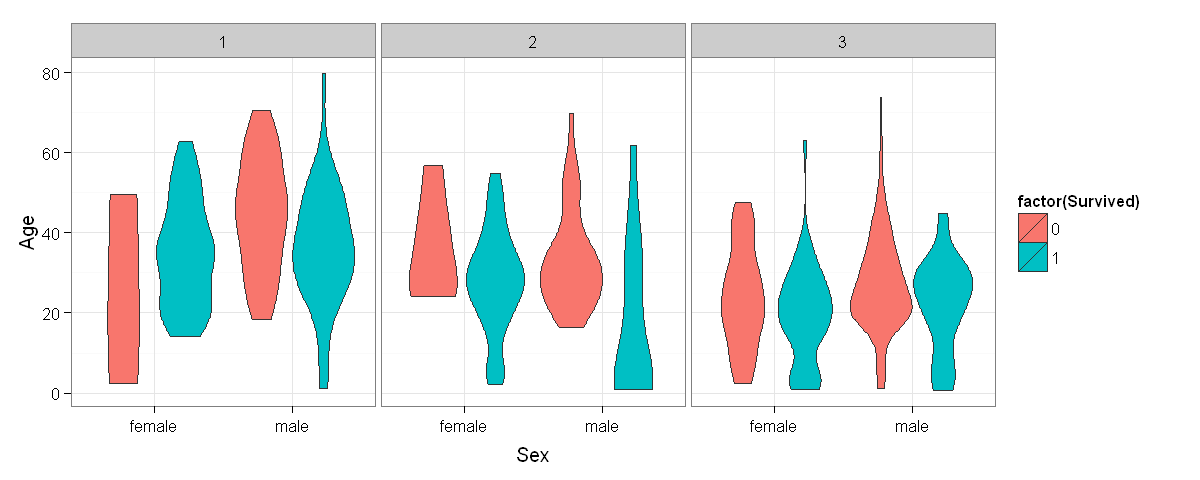

In [24]:
# visualising the survival rate with respect to Sex, Pclass and Age features 
g = ggplot(data = dataset, aes(x = Sex, y = Age, fill = factor(Survived))) # data and aesthetics 
g = g + geom_violin()          # geometries
g = g + facet_grid(~Pclass) # facets 
g = g + theme_bw()          # theme  
print(g)

This was a rudimentary intro to **ggplot2** and **dplyr** packages. More information can be found in the references. 

### References 

1. [dplyr CRAN vignette](https://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html)
2. [magrittr CRAN vignette](https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html)
3. [tidyverse ggplot2 reference](http://ggplot2.tidyverse.org/reference/)
4. [Telling stories with data using the grammar of graphics](https://codewords.recurse.com/issues/six/telling-stories-with-data-using-the-grammar-of-graphics), Liz Sander, Code Words - Issue Six